In [2]:
#Jacob Creasy
#November 20, 2020
#Coding Final Project

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML 

In [4]:
df = pd.read_csv('provinces.csv')
df.head()

,province,year,population,region
0,Adana,2007,2006650,Mediterranean Region
1,Adana,2008,2026319,Mediterranean Region
2,Adana,2009,2062226,Mediterranean Region
3,Adana,2010,2085225,Mediterranean Region
4,Adana,2011,2108805,Mediterranean Region


In [5]:
current_year = 2018
dff = df[df['year'].eq(current_year)].sort_values(by='population', ascending=False).head(15) #assigning the amount of bars you want in your barchart race (top however many)
dff 

,province,year,population,region
479,Istanbul,2018,15067724,Marmara Region
83,Ankara,2018,5503985,Central Anatolia Region
491,Izmir,2018,4320519,Aegean Region
251,Bursa,2018,2994521,Marmara Region
95,Antalya,2018,2426356,Mediterranean Region
11,Adana,2018,2220125,Mediterranean Region
635,Konya,2018,2205609,Central Anatolia Region
815,Sanliurfa,2018,2035809,Southeast Anatolia Region
395,Gaziantep,2018,2028563,Southeast Anatolia Region
623,Kocaeli,2018,1906391,Marmara Region


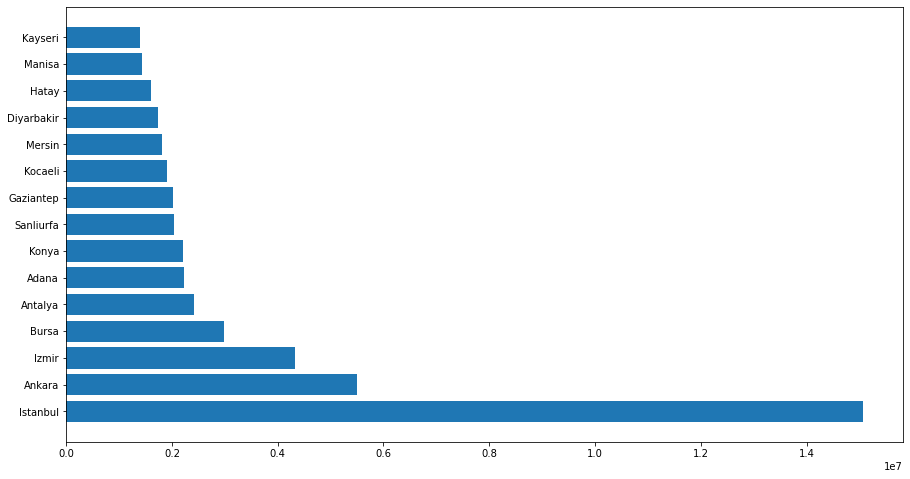

In [6]:
fig, ax = plt.subplots(figsize=(15, 8)) #horizontal Bar Graph
ax.barh(dff['province'], dff['population']) #x axis population y axis province from the dff graph, a horizontal bar graph is plotted with the dff country and population numbers

###################only stuff above this line is graphed in this cell
colors = dict(zip(
    ['Marmara Region','Aegean Region','Mediterranean Region','Central Anatolia Region','Black Sea Region','Eastern Anatolia Region','Southeast Anatolia Region'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50'] #zip two lists
)) #Matches a region up with a color but does not assign it yet
group_lk = df.set_index('province')['region'].to_dict() 

Text(1, 0.4, '2018')

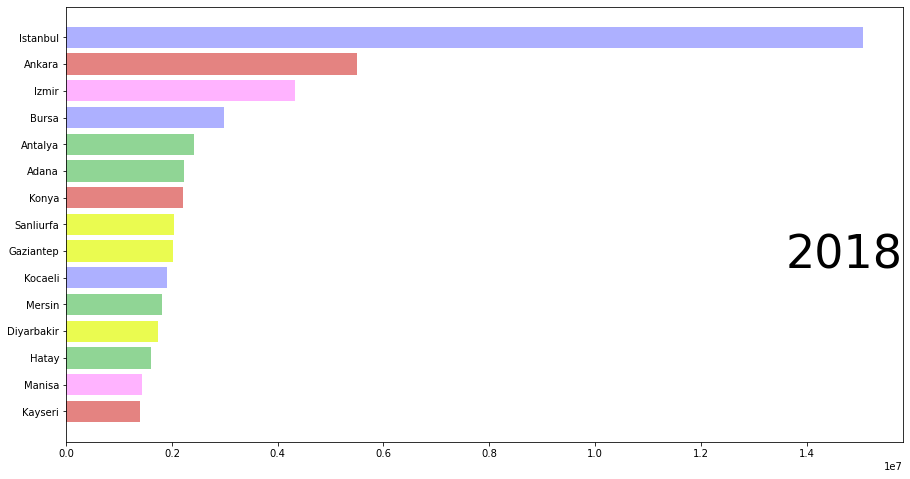

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['province'], dff['population'], color=[colors[group_lk[x]] for x in dff['province']]) #first halfcreates a hbar graph and the second sets a color for each region in the graph
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

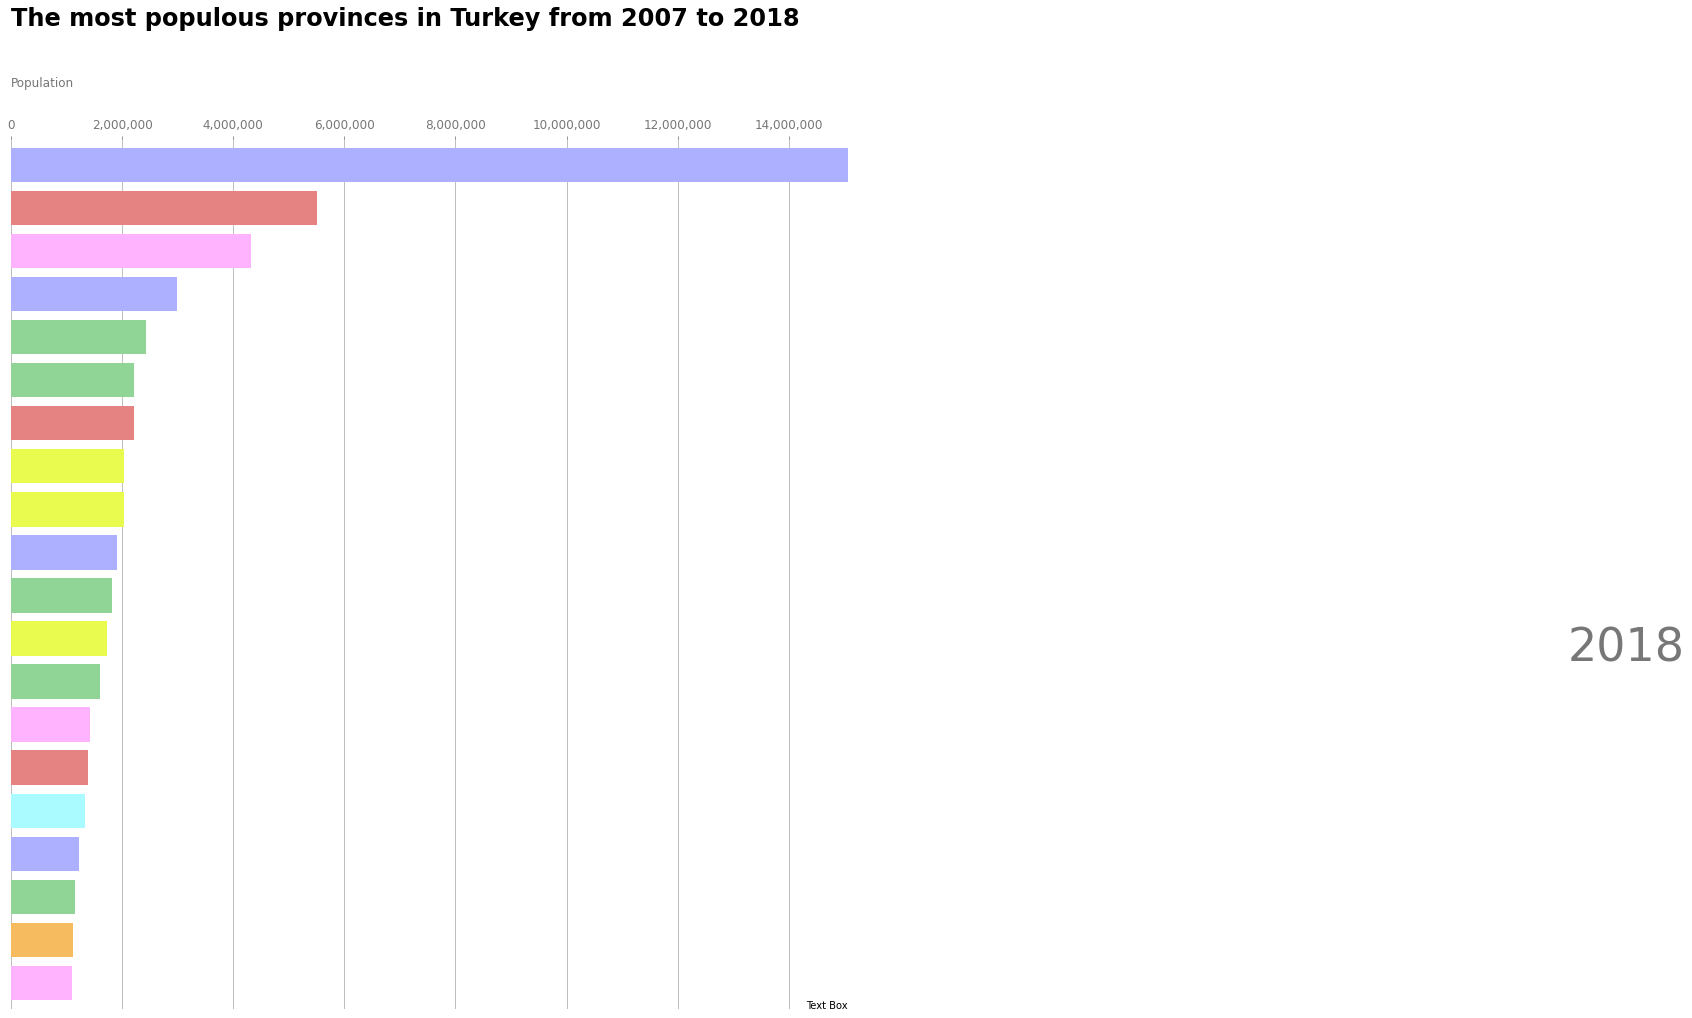

In [13]:
#final version
fig, ax = plt.subplots(figsize=(15, 16))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='population', ascending=True).tail(20) #amount of bars in race
    ax.clear() #not sure
    ax.barh(dff['province'], dff['population'], color=[colors[group_lk[x]] for x in dff['province']]) #setcolors
    dx = dff['population'].max() / 200 #notsure 
    # ... polished styles
    ax.text(2, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500) #current year label
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777') #top left label
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.13, 'The most populous provinces in Turkey from 2007 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left') #
    ax.text(1, 0, 'Text Box', transform=ax.transAxes, ha='right',color='#000000') #name bottom right
    plt.box(False)#outline box
    
draw_barchart(2018)

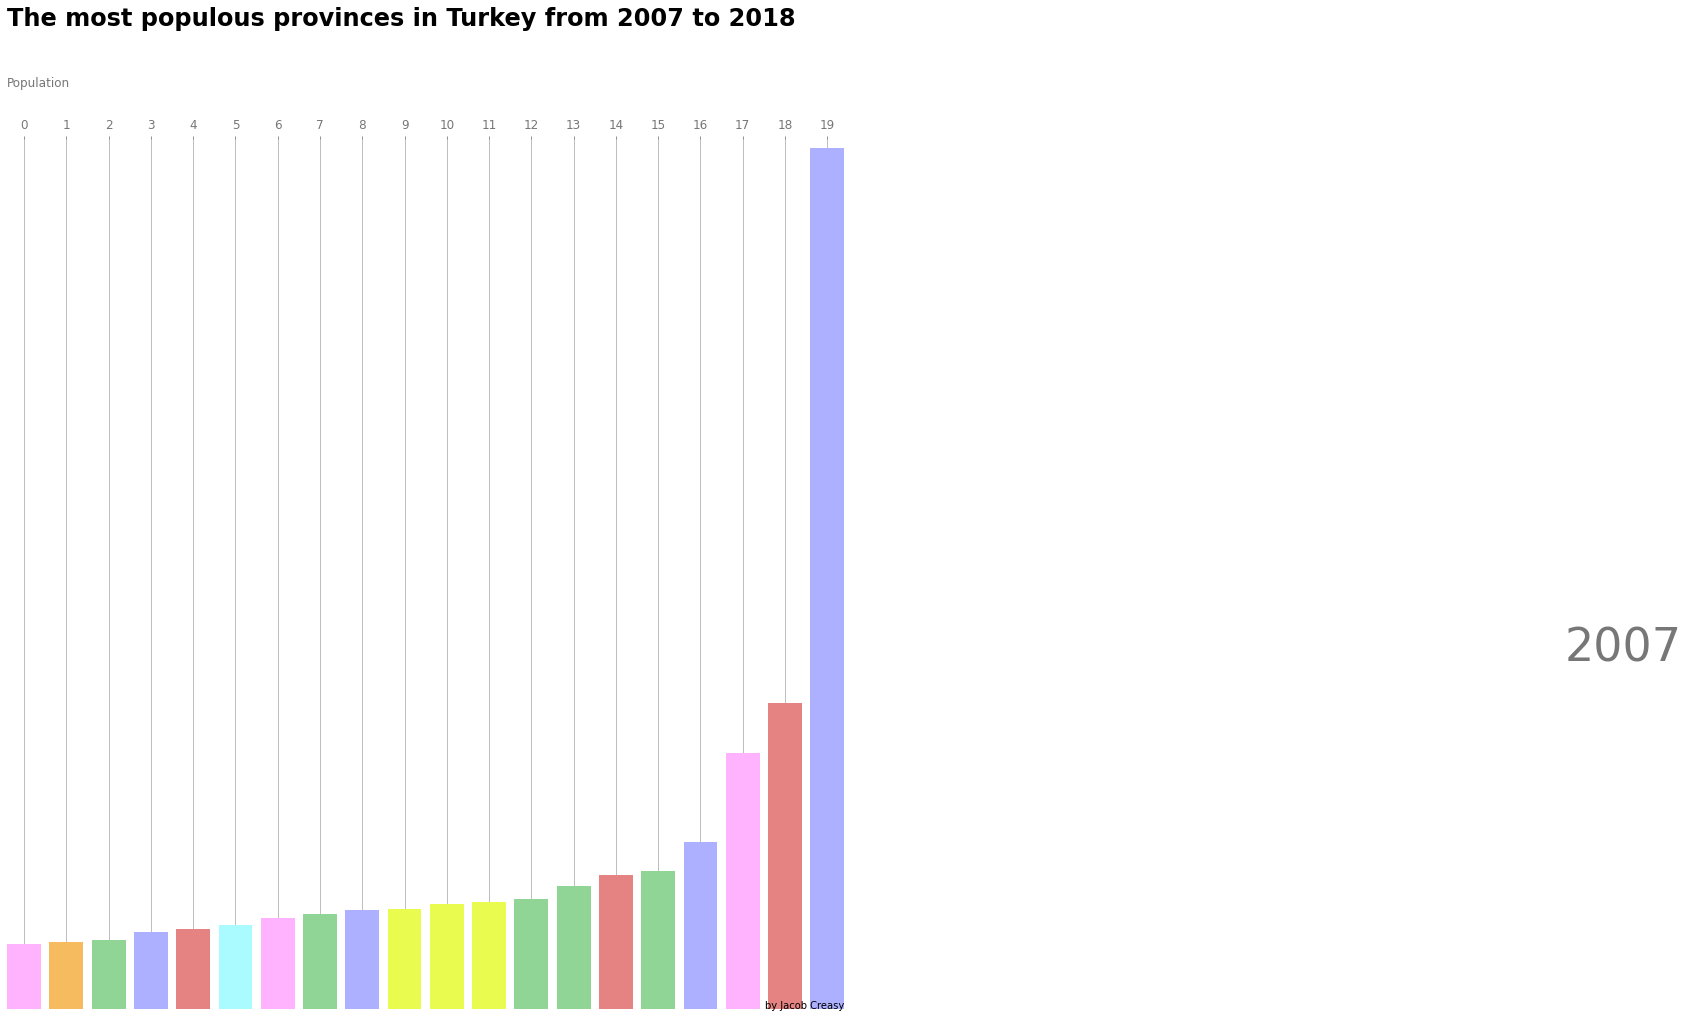

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 16))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2007, 2018))
HTML(animator.to_jshtml()) 